<a href="https://colab.research.google.com/github/BahaFalcon/3.5HW/blob/main/%22House_kg_lab_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Import

In [ ]:
df = pd.read_excel('house_kg.xlsx')
df.columns

Index(['Тип предложения', 'Площадь участка', 'Местоположение', 'Коммуникации',
       'adress', 'describe', 'USD_price', 'KGS_price ',
       'Возможность рассрочки', 'Возможность ипотеки', 'Возможность обмена',
       'Разное', 'Правоустанавливающие документы', 'Серия', 'Кол-во этажей',
       'Высота потолков', 'Состояние', 'Телефон', 'Санузел', 'Канализация',
       'Питьевая вода', 'Электричество', 'Газ', 'Пол'],
      dtype='object')

In [ ]:
df.drop(['Телефон', 'Санузел', 'Канализация',
       'Питьевая вода', 'Электричество', 'Газ'], axis=1, inplace=True)

# Part 1

Помните, как мы парсили данные с сайта House kg?

Давайте рассмотрим полученный датафрейм, его структуру, колонки.

In [ ]:
df.head()

,Тип предложения,Площадь участка,Местоположение,Коммуникации,adress,describe,USD_price,KGS_price,Возможность рассрочки,Возможность ипотеки,Возможность обмена,Разное,Правоустанавливающие документы,Серия,Кол-во этажей,Высота потолков,Состояние,Пол
0,от собственника,60 соток,вдоль трассы,"газ, ...","Бишкек, Баха, Баха Ахунбаева/Баха",Продаётся участок под строительство многоэтажн...,1100000,95439960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,от собственника,2600 соток,вдоль трассы,NaN,"Бишкек, АЮ Grand/Анкара",Продаётся участок под строительство многоэтажн...,17990,1560877,есть,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,от агента,5.8 соток,в городе,"свет, ...","Бишкек, Ден Сяопина - Фучика, Жибек-Жолу 58/44...",Продаётся Участок под бизнес с огромным трафик...,195000,16918902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,от собственника,12 соток,в городе,NaN,"Бишкек, Киргизия 1 ж/м/проспект Ч.Айтматова",Продаётся участок 12 соток (красная книга). К...,660000,57263976,нет,нет,обмен не предлагать,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,от собственника,4 соток,в предгорьях,вода,"Бишкек, ж/м Ала-Арча 2, переулок Торгой 18/Мас...","Продаю земельный участок, площадью 4 соток, пр...",45000,3904362,NaN,есть,обмен не предлагать,"ровный, ...",NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(410, 18)

In [ ]:
df.columns

Index(['Тип предложения', 'Площадь участка', 'Местоположение', 'Коммуникации',
       'adress', 'describe', 'USD_price', 'KGS_price ',
       'Возможность рассрочки', 'Возможность ипотеки', 'Возможность обмена',
       'Разное', 'Правоустанавливающие документы', 'Серия', 'Кол-во этажей',
       'Высота потолков', 'Состояние', 'Пол'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Тип предложения                 409 non-null    object 
 1   Площадь участка                 409 non-null    object 
 2   Местоположение                  186 non-null    object 
 3   Коммуникации                    233 non-null    object 
 4   adress                          410 non-null    object 
 5   describe                        396 non-null    object 
 6   USD_price                       410 non-null    int64  
 7   KGS_price                       410 non-null    int64  
 8   Возможность рассрочки           86 non-null     object 
 9   Возможность ипотеки             118 non-null    object 
 10  Возможность обмена              117 non-null    object 
 11  Разное                          175 non-null    object 
 12  Правоустанавливающие документы  37 n

Давайте удалим те колонки, которые заполнены менее чем на 30%.

In [ ]:
df.columns

Index(['Тип предложения', 'Площадь участка', 'Местоположение', 'Коммуникации',
       'adress', 'describe', 'USD_price', 'KGS_price ',
       'Возможность рассрочки', 'Возможность ипотеки', 'Возможность обмена',
       'Разное', 'Правоустанавливающие документы', 'Серия', 'Кол-во этажей',
       'Высота потолков', 'Состояние', 'Пол'],
      dtype='object')

In [ ]:
# for i in df.columns:
#   if df[i].notnull().sum() / df.shape[0] < 0.3:
#     df.drop(i, axis=1, inplace=True)

df.dropna(thresh=123, axis=1, inplace=True)

In [ ]:
df.shape[0] * 0.3

123.0

In [ ]:
df.dropna(subset = ['Площадь участка'], axis=0, inplace=True)

# Part 2

Давайте приведем в порядок количественные фичи.

Сделаем колонки "площадь участка" в сотках, стоимости и другие в числовом виде.

In [ ]:
%%time
df['Площадь участка'] = df['Площадь участка'].str.replace(' соток', '').astype(float)

# df['Площадь участка'].map(lambda i: float(i.split()[0]))

CPU times: user 1.92 ms, sys: 0 ns, total: 1.92 ms
Wall time: 1.91 ms


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409 entries, 0 to 409
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Тип предложения  409 non-null    object 
 1   Площадь участка  409 non-null    float64
 2   Местоположение   186 non-null    object 
 3   Коммуникации     233 non-null    object 
 4   adress           409 non-null    object 
 5   describe         396 non-null    object 
 6   USD_price        409 non-null    int64  
 7   KGS_price        409 non-null    int64  
 8   Разное           175 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 32.0+ KB


# Part 3

Проверим оутлаеры в Площади участка. Слишком большие или слишком маленькие значения могут быть связаны с опечаткой. Чекнем описание.

In [ ]:
df['Площадь участка'].describe()

count     409.000000
mean       31.234963
std       146.065908
min         1.800000
25%         5.000000
50%         7.000000
75%        12.000000
max      2600.000000
Name: Площадь участка, dtype: float64

In [ ]:
df[df['Площадь участка'] == df['Площадь участка'].max()]['describe'].values

array(['Продаётся участок под строительство многоэтажных домов\r \r По ул. Анкара (Горького) (ор-р ЖМ Алтын Ордо) \r вдоль улицы Анкара \r \r 26 ГА (2600 соток)\r Красная книга \r Первая линия \r Все коммуникации  Цена за 1 сотку'],
      dtype=object)

# Part 4

Создадим фичу 'Price_sq' - стоимость за сотку в долларах.

Посмотрим на описательную статистику и при наличии оутлаеров обрежем по 2.5 процента по краям.

In [ ]:
df['Price_sq'] = df.USD_price / df['Площадь участка']

In [ ]:
df['Price_sq'].describe()

count       409.000000
mean      20069.914061
std       18160.812779
min           6.919231
25%        9000.000000
50%       14000.000000
75%       26666.666667
max      115000.000000
Name: Price_sq, dtype: float64

In [ ]:
df['Price_sq'].quantile(.05)
df['Price_sq'].quantile(.97)

66609.52380952382

In [ ]:
mask1 = df['Price_sq'] >= df['Price_sq'].quantile(.05)
mask2 = df['Price_sq'] <= df['Price_sq'].quantile(.97)

In [ ]:
df = df[mask1 & mask2]

# Part 5

Приведем в порядок фичу Коммуникации.

Сделаем фичи "газ", "свет"... с бинарным значением 0 и 1 по фиче "Коммуникации"

In [ ]:
col_com = ['газ', 'свет', 'канализация', 'вода', 'отопление', 'интернет', 'телефон']

In [ ]:
df['Коммуникации'].fillna('0', inplace=True)

In [ ]:
for col in col_com:
  df[col] = df['Коммуникации'].map(lambda i: 1 if col in i else 0)

In [ ]:
df.head()

,Тип предложения,Площадь участка,Местоположение,Коммуникации,adress,describe,USD_price,KGS_price,Разное,Price_sq,газ,свет,канализация,вода,отопление,интернет,телефон
0,от собственника,60.0,вдоль трассы,"газ, ...","Бишкек, Баха, Баха Ахунбаева/Баха",Продаётся участок под строительство многоэтажн...,1100000,95439960,NaN,18333.333333,1,0,1,1,1,0,0
2,от агента,5.8,в городе,"свет, ...","Бишкек, Ден Сяопина - Фучика, Жибек-Жолу 58/44...",Продаётся Участок под бизнес с огромным трафик...,195000,16918902,NaN,33620.689655,1,1,1,1,0,1,0
3,от собственника,12.0,в городе,0,"Бишкек, Киргизия 1 ж/м/проспект Ч.Айтматова",Продаётся участок 12 соток (красная книга). К...,660000,57263976,NaN,55000.000000,0,0,0,0,0,0,0
4,от собственника,4.0,в предгорьях,вода,"Бишкек, ж/м Ала-Арча 2, переулок Торгой 18/Мас...","Продаю земельный участок, площадью 4 соток, пр...",45000,3904362,"ровный, ...",11250.000000,0,0,0,1,0,0,0
5,от агента,3.5,в городе,"свет, ...","Бишкек, Кудайберген, 9 января/Садыгалиева","Продаю дом, 3к, сам, 3.54сот, кр/кн, Садыгал...",31500,2733053,"огорожен, ...",9000.000000,1,1,1,1,0,0,0


In [ ]:
pd.get_dummies(df['Местоположение'])

,в городе,в дачном массиве,в предгорьях,в пригороде,вдоль трассы
0,0,0,0,0,1
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0
5,1,0,0,0,0
...,...,...,...,...,...
405,1,0,0,0,0
406,0,0,0,1,0
407,1,0,0,0,0
408,1,0,0,0,0


In [ ]:
# df['Коммуникации'].str.get_dummies(sep=',')

,вода,газ,интернет,канализация,отопление,свет,телефон,вода,газ,интернет,канализация,отопление,свет
0,1,0,0,1,1,0,0,0,1,0,0,0,0
2,1,1,1,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0
5,1,1,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,0,1,0,1,0,0,0,0,0,0,0,0,1
406,1,1,0,1,0,0,0,0,0,0,0,0,1
407,1,1,0,0,0,0,0,0,0,0,0,0,1
408,0,1,0,1,1,0,1,0,0,0,0,0,1


# Part 6

Аналогичные действия предпримем для правоустанавливающих документов.

In [ ]:
kr_1 = 'красная книга'
kr_2 = 'кызыл китеп'
kr_3 = 'гос акт'
kr_4 = 'кр книга'

In [ ]:
df['describe'].fillna('0', inplace=True)

In [ ]:
df['Красная книга'] = df['describe'].map(lambda i: 1 if (kr_4 in i.lower()) or (kr_3 in i.lower()) or (kr_2 in i.lower()) or (kr_1 in i.lower()) else 0)

In [ ]:
df.head()

,Тип предложения,Площадь участка,Местоположение,Коммуникации,adress,describe,USD_price,KGS_price,Разное,Price_sq,газ,свет,канализация,вода,отопление,интернет,телефон,Красная книга
0,от собственника,60.0,вдоль трассы,"газ, ...","Бишкек, Баха, Баха Ахунбаева/Баха",Продаётся участок под строительство многоэтажн...,1100000,95439960,NaN,18333.333333,1,0,1,1,1,0,0,1
2,от агента,5.8,в городе,"свет, ...","Бишкек, Ден Сяопина - Фучика, Жибек-Жолу 58/44...",Продаётся Участок под бизнес с огромным трафик...,195000,16918902,NaN,33620.689655,1,1,1,1,0,1,0,1
3,от собственника,12.0,в городе,0,"Бишкек, Киргизия 1 ж/м/проспект Ч.Айтматова",Продаётся участок 12 соток (красная книга). К...,660000,57263976,NaN,55000.000000,0,0,0,0,0,0,0,1
4,от собственника,4.0,в предгорьях,вода,"Бишкек, ж/м Ала-Арча 2, переулок Торгой 18/Мас...","Продаю земельный участок, площадью 4 соток, пр...",45000,3904362,"ровный, ...",11250.000000,0,0,0,1,0,0,0,0
5,от агента,3.5,в городе,"свет, ...","Бишкек, Кудайберген, 9 января/Садыгалиева","Продаю дом, 3к, сам, 3.54сот, кр/кн, Садыгал...",31500,2733053,"огорожен, ...",9000.000000,1,1,1,1,0,0,0,0


# Part 7

Попробуем установить зависимости между медианой и средним по стоимости и стоимости за сотку в зависимости от наличия Газа, электричества, Вида правоустанавливающих документов и местоположения.

Будем использовать Groupby()

In [ ]:
df.groupby('газ', as_index=False).agg({'USD_price': ['mean', 'median'], 'Price_sq': ['mean', 'median']})

газ      USD_price                Price_sq              
                mean    median          mean        median
0   0  271344.263415  135000.0  18707.217522  15000.000000
1   1  235200.280702  100000.0  18624.846518  14166.666667

In [ ]:
np.corrcoef(df['газ'], df['Price_sq'])

array([[ 1.        , -0.00330113],
       [-0.00330113,  1.        ]])

# Part 8

Попробуем проранжировать фичу стоимость за сотку на 3 категории: Дешево, Средне, Дорого.

Создадим новую фичу, где укажем медианую стоимость за сотку участка для каждой категории.

In [ ]:
df.columns

Index(['Тип предложения', 'Площадь участка', 'Местоположение', 'Коммуникации',
       'adress', 'describe', 'USD_price', 'KGS_price ', 'Разное', 'Price_sq',
       'газ', 'свет', 'канализация', 'вода', 'отопление', 'интернет',
       'телефон', 'Красная книга'],
      dtype='object')

In [ ]:
labels = ['Дешевая', 'Средняя', 'Дорогая']

In [ ]:
df['cat'] = pd.cut(df.Price_sq, 3, labels=labels)

In [ ]:
df.head()

,Тип предложения,Площадь участка,Местоположение,Коммуникации,adress,describe,USD_price,KGS_price,Разное,Price_sq,газ,свет,канализация,вода,отопление,интернет,телефон,Красная книга,cat
0,от собственника,60.0,вдоль трассы,"газ, ...","Бишкек, Баха, Баха Ахунбаева/Баха",Продаётся участок под строительство многоэтажн...,1100000,95439960,NaN,18333.333333,1,0,1,1,1,0,0,1,Дешевая
2,от агента,5.8,в городе,"свет, ...","Бишкек, Ден Сяопина - Фучика, Жибек-Жолу 58/44...",Продаётся Участок под бизнес с огромным трафик...,195000,16918902,NaN,33620.689655,1,1,1,1,0,1,0,1,Средняя
3,от собственника,12.0,в городе,0,"Бишкек, Киргизия 1 ж/м/проспект Ч.Айтматова",Продаётся участок 12 соток (красная книга). К...,660000,57263976,NaN,55000.000000,0,0,0,0,0,0,0,1,Дорогая
4,от собственника,4.0,в предгорьях,вода,"Бишкек, ж/м Ала-Арча 2, переулок Торгой 18/Мас...","Продаю земельный участок, площадью 4 соток, пр...",45000,3904362,"ровный, ...",11250.000000,0,0,0,1,0,0,0,0,Дешевая
5,от агента,3.5,в городе,"свет, ...","Бишкек, Кудайберген, 9 января/Садыгалиева","Продаю дом, 3к, сам, 3.54сот, кр/кн, Садыгал...",31500,2733053,"огорожен, ...",9000.000000,1,1,1,1,0,0,0,0,Дешевая


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 409
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Тип предложения  376 non-null    object  
 1   Площадь участка  376 non-null    float64 
 2   Местоположение   172 non-null    object  
 3   Коммуникации     376 non-null    object  
 4   adress           376 non-null    object  
 5   describe         376 non-null    object  
 6   USD_price        376 non-null    int64   
 7   KGS_price        376 non-null    int64   
 8   Разное           166 non-null    object  
 9   Price_sq         376 non-null    float64 
 10  газ              376 non-null    int64   
 11  свет             376 non-null    int64   
 12  канализация      376 non-null    int64   
 13  вода             376 non-null    int64   
 14  отопление        376 non-null    int64   
 15  интернет         376 non-null    int64   
 16  телефон          376 non-null    int64   
 1

# Part 9

Сгруппируем датасет по категории стоимости (Part 8) и посмотрим на медианы и средние площади. Какие выводы можно сделать? Может ли быть так, что цены не очень адекватны.

In [ ]:
df.groupby('cat').agg({'Площадь участка': ['median', 'mean', 'max']})

Площадь участка                  
                 median       mean    max
cat                                      
Дешевая           7.000  14.468819  360.0
Средняя           7.000  14.549451   60.0
Дорогая           6.005  10.486429   63.0

# Part 10

Влияет ли фича "тип предложения" на Стоимость.

In [ ]:
df['Тип предложения'].apply(lambda x: 1 if x == 'от собственника' else 0)

0      1
2      0
3      1
4      1
5      0
      ..
405    0
406    0
407    1
408    1
409    1
Name: Тип предложения, Length: 376, dtype: int64

In [ ]:
df.groupby('Тип предложения', as_index=False).agg({'USD_price': ['min', 'mean', 'max']})

Тип предложения USD_price                        
                         min           mean      max
0        от агента     15000  280204.203540  3000000
1  от собственника     16000  216791.146667  2600000

In [ ]:
df['Тип предложения'] = df['Тип предложения'].apply(lambda x: 1 if x == 'от собственника' else 0)

In [ ]:
np.corrcoef(df['Тип предложения'], df['USD_price'])

array([[ 1.        , -0.07124158],
       [-0.07124158,  1.        ]])

<ipython-input-121-534f4f3c80b7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

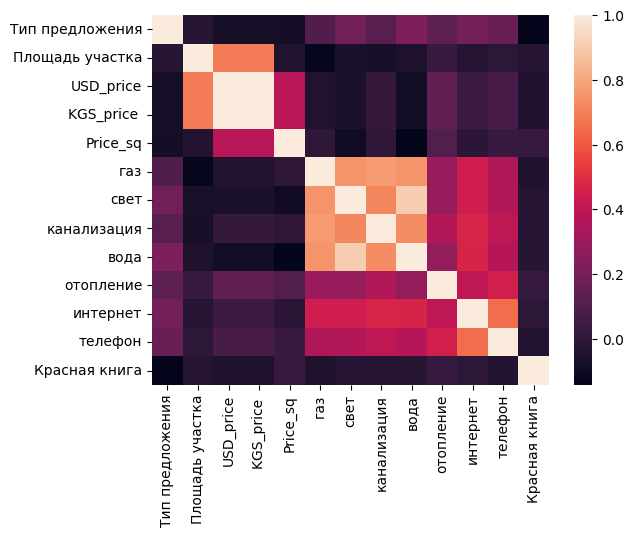

In [ ]:
import seaborn as sns
sns.heatmap(df.corr())

# Part 11

Примерно какой курс доллара к сому в объявлениях?

In [ ]:
ex_rates = df['KGS_price '].mean() / df['USD_price'].mean()

In [ ]:
ex_rates

86.7635993375305

# Part 12
## Визуализация

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df.head(3)

,Тип предложения,Площадь участка,Местоположение,Коммуникации,adress,describe,USD_price,KGS_price,Разное,Price_sq,Газ,Свет,Канализация,Вода,Отопление,Красная книга,Category
0,от собственника,60.0,вдоль трассы,"газ, ...","Бишкек, Баха, Баха Ахунбаева/Баха",Продаётся участок под строительство многоэтажн...,1100000,95439960,NaN,18333.333333,1,0,1,1,1,1,Средняя
2,от агента,5.8,в городе,"свет, ...","Бишкек, Ден Сяопина - Фучика, Жибек-Жолу 58/44...",Продаётся Участок под бизнес с огромным трафик...,195000,16918902,NaN,33620.689655,1,1,1,1,0,1,Дорогая
4,от собственника,4.0,в предгорьях,вода,"Бишкек, ж/м Ала-Арча 2, переулок Торгой 18/Мас...","Продаю земельный участок, площадью 4 соток, пр...",45000,3904362,"ровный, ...",11250.000000,0,0,0,1,0,0,Дешевая


In [ ]:
nom_col = ['Газ', 'Свет', 'Канализация', 'Вода', 'Отопление', 'Красная книга']
nom_sum = [df[i].sum() for i in nom_col]
df_comm = pd.DataFrame({'communication': nom_col, 'count': nom_sum })
df_comm.sort_values('count', ascending=False, inplace=True)
df_comm

,communication,count
3,Вода,181
1,Свет,176
5,Красная книга,157
0,Газ,155
2,Канализация,151
4,Отопление,45


<Axes: xlabel='count', ylabel='communication'>

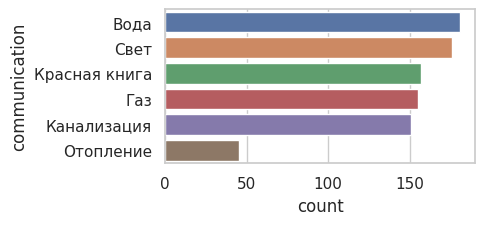

In [ ]:
sns.axes_style("darkgrid")
plt.subplots(figsize=(4, 2))
sns.barplot(data=df_comm, x='count', y='communication')

Построим гистограмму по Категории стоимости, по местоположению, по наличию коммуникаций.

Text(0.5, 1.0, 'Категории стоимости участков')

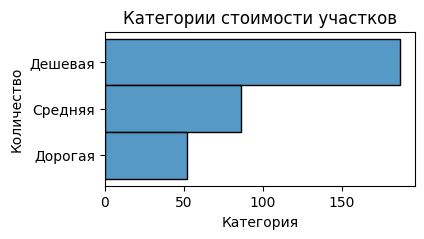

In [ ]:
plt.subplots(figsize=(4, 2))
sns.histplot(data=df, y='Category')

plt.xlabel('Категория')
plt.ylabel('Количество')
plt.title("Категории стоимости участков")

Text(0.5, 1.0, 'Местоположения участков')

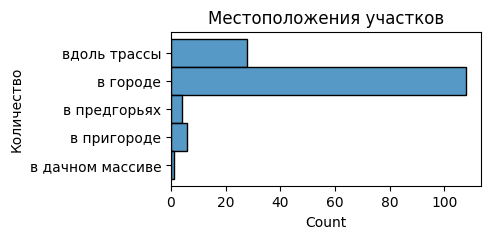

In [ ]:
plt.subplots(figsize=(4, 2))
sns.histplot(data = df, y='Местоположение')

plt.ylabel('Количество')
plt.title("Местоположения участков")

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(1, 4))
sns.histplot(data=df, y='Category', ax=ax[0])
plt.xticks(rotation=70)
sns.histplot(data = df, y='Местоположение', ax=ax[1])

NameError: ignored

Боксплот стоимости и стоимости за сотку в зависимости от местоположения

<Axes: xlabel='USD_price', ylabel='Местоположение'>

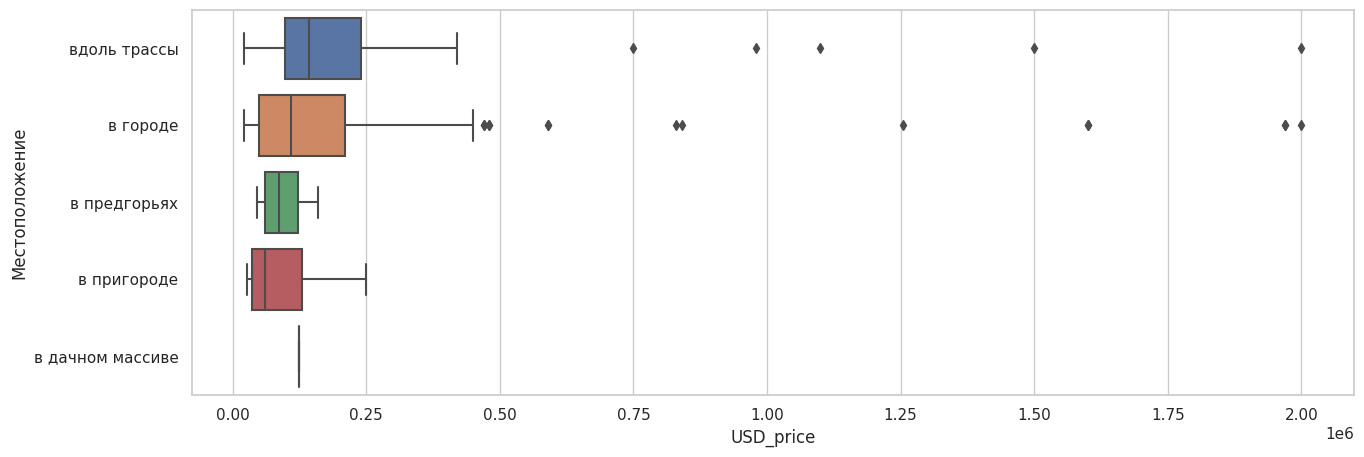

In [ ]:
plt.subplots(figsize=(15, 5))
sns.boxplot(data=df, x='USD_price', y='Местоположение')

<Axes: xlabel='Price_sq', ylabel='Category'>

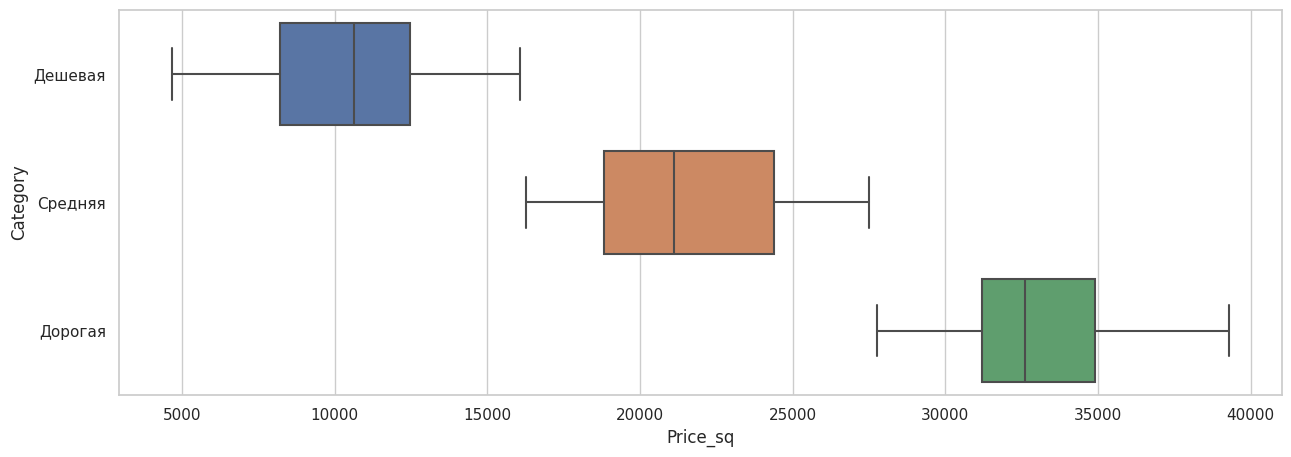

In [ ]:
plt.subplots(figsize=(15, 5))
sns.boxplot(data=df, x='Price_sq', y='Category')

In [ ]:
dff = df[df.USD_price<=250000]

<Axes: xlabel='USD_price', ylabel='Площадь участка'>

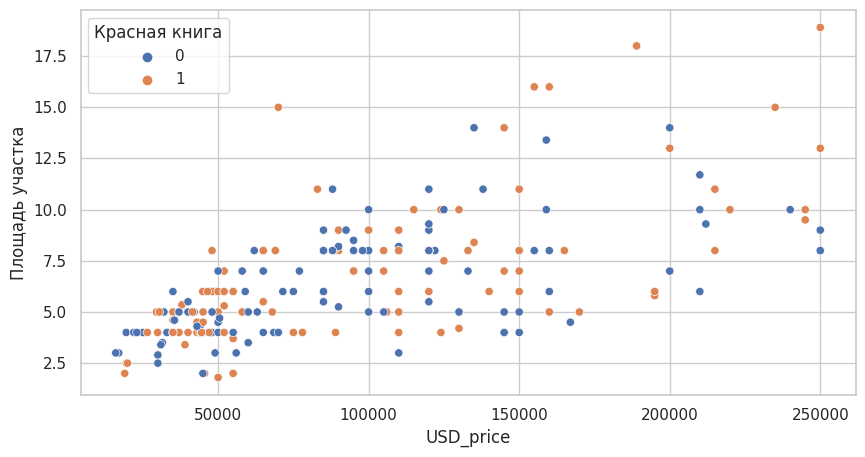

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x = dff.USD_price, y = dff['Площадь участка'], hue=dff['Красная книга'])

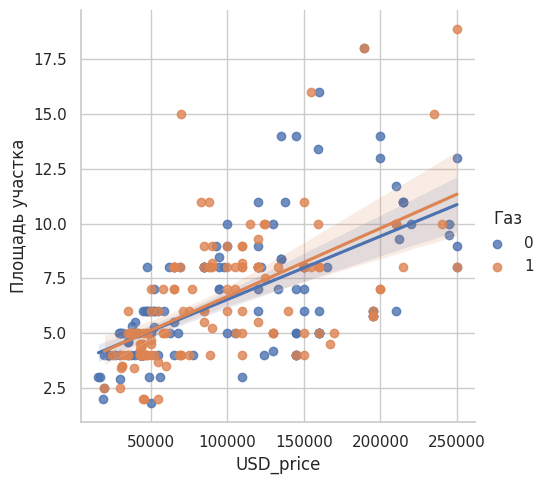

In [ ]:
sns.lmplot(data = dff, x = 'USD_price', y = 'Площадь участка', hue='Газ')

In [ ]:
df_group = df.groupby('Местоположение', as_index=False).agg({'Price_sq': 'mean'}).sort_values('Price_sq', ascending=False)
df_group

,Местоположение,Price_sq
4,вдоль трассы,20842.335295
0,в городе,17611.873152
1,в дачном массиве,16666.666667
2,в предгорьях,14325.378788
3,в пригороде,9904.199603


<Axes: xlabel='Газ', ylabel='Price_sq'>

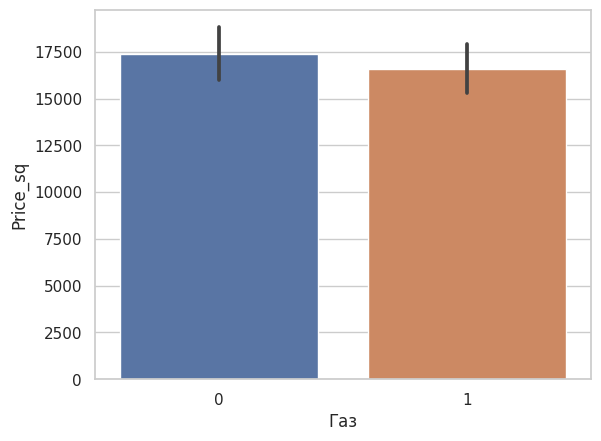

In [ ]:
sns.barplot(data=df, y='Price_sq', x='Газ')

In [ ]:
matrix = df.corr()

<Axes: >

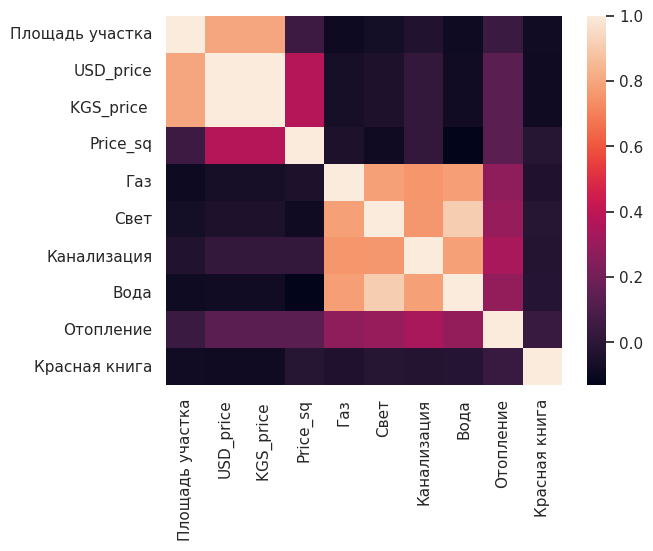

In [ ]:
sns.heatmap(matrix)

In [ ]:
pd.get_dummies(df['Местоположение'])

,в городе,в дачном массиве,в предгорьях,в пригороде,вдоль трассы
0,0,0,0,0,1
2,1,0,0,0,0
4,0,0,1,0,0
5,1,0,0,0,0
7,1,0,0,0,0
...,...,...,...,...,...
405,1,0,0,0,0
406,0,0,0,1,0
407,1,0,0,0,0
408,1,0,0,0,0


In [ ]:
df = pd.concat([df, pd.get_dummies(df['Местоположение'])], axis=1).drop('Местоположение', axis=1)

In [ ]:
df.columns

Index(['Тип предложения', 'Площадь участка', 'Коммуникации', 'adress',
       'describe', 'USD_price', 'KGS_price ', 'Разное', 'Price_sq', 'Газ',
       'Свет', 'Канализация', 'Вода', 'Отопление', 'Красная книга', 'Category',
       'в городе', 'в дачном массиве', 'в предгорьях', 'в пригороде',
       'вдоль трассы'],
      dtype='object')

<Axes: >

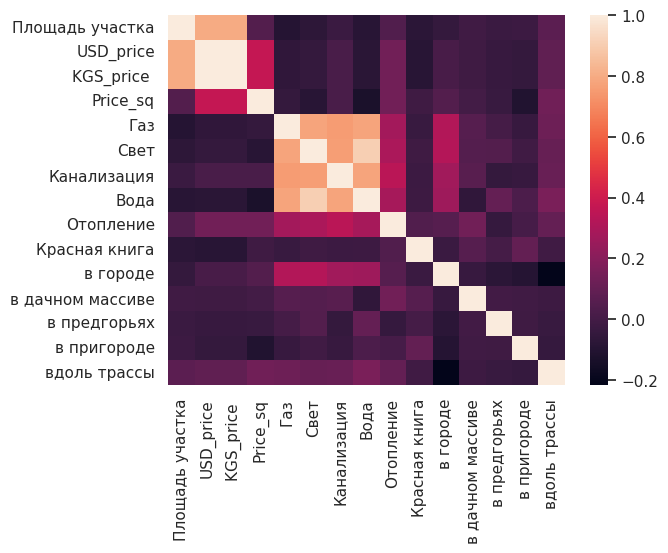

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.drop('Разное', axis = 1, inplace=True)

In [ ]:
df.rename({'adress': 'address'}, axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 409
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Тип предложения   325 non-null    object 
 1   Площадь участка   325 non-null    float64
 2   Коммуникации      325 non-null    object 
 3   address           325 non-null    object 
 4   describe          317 non-null    object 
 5   USD_price         325 non-null    int64  
 6   KGS_price         325 non-null    int64  
 7   Price_sq          325 non-null    float64
 8   Газ               325 non-null    int64  
 9   Свет              325 non-null    int64  
 10  Канализация       325 non-null    int64  
 11  Вода              325 non-null    int64  
 12  Отопление         325 non-null    int64  
 13  в городе          325 non-null    uint8  
 14  в дачном массиве  325 non-null    uint8  
 15  в предгорьях      325 non-null    uint8  
 16  в пригороде       325 non-null    uint8  
 1

In [ ]:
df.drop(['KGS_price ', 'address', 'describe', 'Коммуникации', 'Тип предложения'], axis=1, inplace=True)
df.drop(df.index[300:], axis=0, inplace=True)

In [ ]:
'Площадь участка', 'USD_price', 'Price_sq', 'Газ', 'Свет',
'Канализация', 'Вода', 'Отопление', 'Красная книга', 'в городе',
'в дачном массиве', 'в предгорьях', 'в пригороде', 'вдоль трассы'

In [ ]:
df.columns

Index(['Площадь участка', 'USD_price', 'Price_sq', 'Газ', 'Свет',
       'Канализация', 'Вода', 'Отопление', 'в городе', 'в дачном массиве',
       'в предгорьях', 'в пригороде', 'вдоль трассы'],
      dtype='object')

In [ ]:
df.to_excel("houses.xlsx")